In [1]:
import pandas as pd

In [2]:
DimCst = pd.read_csv('D:/DataSets/DW/DimCst.csv')

In [3]:
DimLoc = pd.read_csv('D:/DataSets/DW/DimLoc.csv')

In [4]:
DimPrd = pd.read_csv('D:/DataSets/DW/DimPrd.csv')

In [5]:
DimDt = pd.read_csv('D:/DataSets/DW/DimDt.csv')

In [6]:
SalesFct = pd.read_csv('D:/DataSets/DW/SalesFct.csv')

In [7]:
SaleCstsFct = pd.read_csv('D:/DataSets/DW/SaleCstsFct.csv')

In [8]:
DimCst.head()

,CustKey,Customer ID,Customer Name,Segment
0,1,AA-10315,Alex Avila,Consumer
1,2,AA-10375,Allen Armold,Consumer
2,3,AA-10480,Andrew Allen,Consumer
3,4,AA-10645,Anna Andreadi,Consumer
4,5,AB-10015,Aaron Bergman,Consumer


In [9]:
DimLoc.head()

,CityKey,City,State,Country,Region
0,1,Aberdeen,South Dakota,United States,Central
1,2,Abilene,Texas,United States,Central
2,3,Akron,Ohio,United States,East
3,4,Albuquerque,New Mexico,United States,West
4,5,Alexandria,Virginia,United States,South


In [10]:
DimPrd.head()

,Product ID,Product Name,Sub-Category,Category
0,FUR-BO-10000112,"Bush Birmingham Collection Bookcase, Dark Cherry",Bookcases,Furniture
1,FUR-BO-10000330,"Sauder Camden County Barrister Bookcase, Plank...",Bookcases,Furniture
2,FUR-BO-10000362,Sauder Inglewood Library Bookcases,Bookcases,Furniture
3,FUR-BO-10000468,O'Sullivan 2-Shelf Heavy-Duty Bookcases,Bookcases,Furniture
4,FUR-BO-10000711,"Hon Metal Bookcases, Gray",Bookcases,Furniture


In [11]:
DimDt.head()

,Order Date,Day,Week,Month,Quarter,Year
0,2014-01-03,3,1,1,1,2014
1,2014-01-04,4,1,1,1,2014
2,2014-01-05,5,1,1,1,2014
3,2014-01-06,6,2,1,1,2014
4,2014-01-07,7,2,1,1,2014


In [12]:
SalesFct.head()

,Order Date,City,Product ID,SalesQtyTotal,SalesAmtTotal,DisAmtTotal,ProfAmtTotal,CostAmt
0,2014-01-03,Houston,OFF-PA-10000174,2,16.448,0.2,5.5512,10.8968
1,2014-01-04,Naperville,OFF-BI-10004094,2,3.540,0.8,-5.4870,9.0270
2,2014-01-04,Naperville,OFF-LA-10003223,3,11.784,0.2,4.2717,7.5123
3,2014-01-04,Naperville,OFF-ST-10002743,3,272.736,0.2,-64.7748,337.5108
4,2014-01-05,Philadelphia,OFF-AR-10003478,3,19.536,0.2,4.8840,14.6520


In [13]:
SaleCstsFct.head()

,Order Date,Customer ID,City,Product ID,SalesQtyTotal,SalesAmtTotal,DisAmtTotal,ProfAmtTotal
0,2014-01-03,DP-13000,Houston,OFF-PA-10000174,2,16.448,0.2,5.5512
1,2014-01-04,PO-19195,Naperville,OFF-BI-10004094,2,3.540,0.8,-5.4870
2,2014-01-04,PO-19195,Naperville,OFF-LA-10003223,3,11.784,0.2,4.2717
3,2014-01-04,PO-19195,Naperville,OFF-ST-10002743,3,272.736,0.2,-64.7748
4,2014-01-05,MB-18085,Philadelphia,OFF-AR-10003478,3,19.536,0.2,4.8840


# getting top 3 most sold product qty

In [14]:
top3 = SalesFct.groupby('Product ID').agg(TotalQty=('SalesQtyTotal','sum'))
top3

,TotalQty
Product ID,
FUR-BO-10000112,9
FUR-BO-10000330,10
FUR-BO-10000362,14
FUR-BO-10000468,21
FUR-BO-10000711,12
...,...
TEC-PH-10004912,11
TEC-PH-10004922,19
TEC-PH-10004924,8


In [15]:
filtertop3 = top3.nlargest(3,'TotalQty')
filtertop3

,TotalQty
Product ID,
TEC-AC-10003832,75
OFF-PA-10001970,70
OFF-BI-10001524,67


# Merge filtertop3 with DimPrd

In [16]:
top3_DimPrd = pd.merge(filtertop3, DimPrd, on = 'Product ID')
top3_DimPrd

,Product ID,TotalQty,Product Name,Sub-Category,Category
0,TEC-AC-10003832,75,Logitech P710e Mobile Speakerphone,Accessories,Technology
1,TEC-AC-10003832,75,Imation 16GB Mini TravelDrive USB 2.0 Flash Drive,Accessories,Technology
2,OFF-PA-10001970,70,Xerox 1908,Paper,Office Supplies
3,OFF-PA-10001970,70,Xerox 1881,Paper,Office Supplies
4,OFF-BI-10001524,67,GBC Premium Transparent Covers with Diagonal L...,Binders,Office Supplies


In [17]:
top3_DimPrd=top3_DimPrd[['Product ID','Product Name','TotalQty']]
top3_DimPrd

,Product ID,Product Name,TotalQty
0,TEC-AC-10003832,Logitech P710e Mobile Speakerphone,75
1,TEC-AC-10003832,Imation 16GB Mini TravelDrive USB 2.0 Flash Drive,75
2,OFF-PA-10001970,Xerox 1908,70
3,OFF-PA-10001970,Xerox 1881,70
4,OFF-BI-10001524,GBC Premium Transparent Covers with Diagonal L...,67


<BarContainer object of 5 artists>

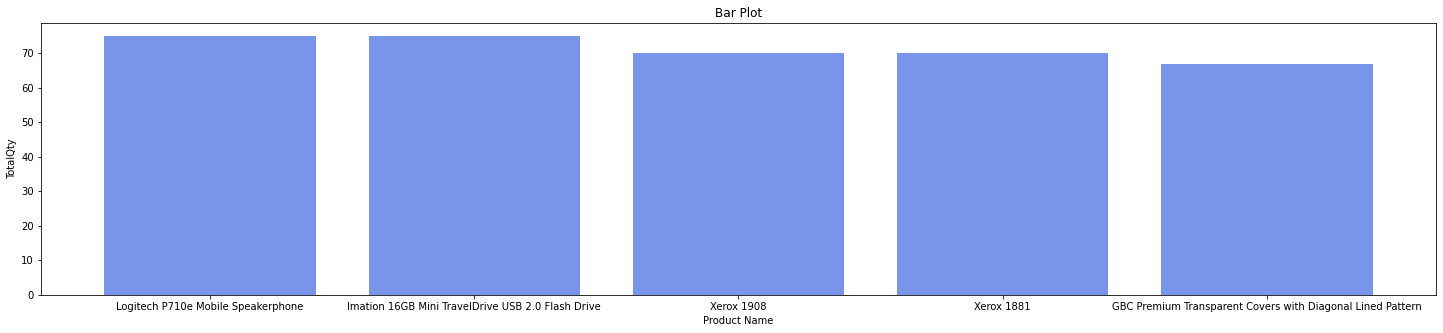

In [18]:
import matplotlib.pyplot as plt
plt.figure(figsize=(25,5))
plt.title('Bar Plot')
plt.xlabel('Product Name')
plt.ylabel('TotalQty')
plt.bar(top3_DimPrd['Product Name'],top3_DimPrd['TotalQty'],color='royalblue',alpha=0.7)

In [19]:
ctg = pd.merge(SalesFct,DimPrd,on='Product ID')
ctg

,Order Date,City,Product ID,SalesQtyTotal,SalesAmtTotal,DisAmtTotal,ProfAmtTotal,CostAmt,Product Name,Sub-Category,Category
0,2014-01-03,Houston,OFF-PA-10000174,2,16.448,0.20,5.5512,10.8968,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",Paper,Office Supplies
1,2014-02-24,Medford,OFF-PA-10000174,4,32.896,0.20,11.1024,21.7936,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",Paper,Office Supplies
2,2014-09-07,Santa Clara,OFF-PA-10000174,2,20.560,0.00,9.6632,10.8968,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",Paper,Office Supplies
3,2014-09-26,Lancaster,OFF-PA-10000174,4,32.896,0.20,11.1024,21.7936,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",Paper,Office Supplies
4,2015-12-03,Philadelphia,OFF-PA-10000174,2,16.448,0.20,5.5512,10.8968,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",Paper,Office Supplies
...,...,...,...,...,...,...,...,...,...,...,...
10317,2017-11-19,Carrollton,OFF-PA-10000308,4,16.896,0.20,5.2800,11.6160,Xerox 1901,Paper,Office Supplies
10318,2017-11-30,New York City,TEC-PH-10001468,3,546.060,0.00,163.8180,382.2420,Panasonic Business Telephones KX-T7736,Phones,Technology
10319,2017-12-04,Nashville,TEC-MA-10001856,2,649.000,0.50,-272.5800,921.5800,Okidata C610n Printer,Machines,Technology
10320,2017-12-18,Encinitas,FUR-BO-10002206,1,119.833,0.15,-12.6882,132.5212,"Bush Saratoga Collection 5-Shelf Bookcase, Han...",Bookcases,Furniture


In [20]:
ctg=ctg[['Category', 'SalesQtyTotal']]

In [21]:
ctg=ctg.groupby(['Category']).agg(TotalQty = ('SalesQtyTotal', 'sum'))

In [22]:
ctg

,TotalQty
Category,
Furniture,8379
Office Supplies,23518
Technology,7249


In [23]:
ctg.sort_values(by='TotalQty',ascending=False)

,TotalQty
Category,
Office Supplies,23518
Furniture,8379
Technology,7249


<BarContainer object of 5 artists>

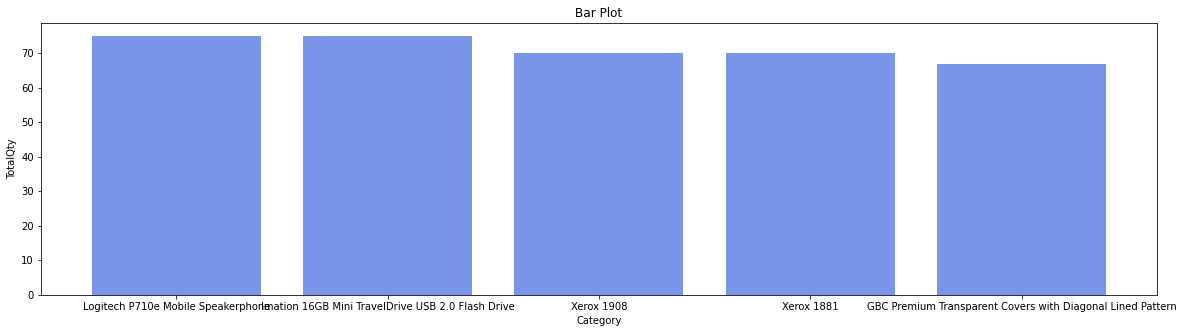

In [25]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,5))
plt.title('Bar Plot')
plt.xlabel('Category')
plt.ylabel('TotalQty')
plt.bar(top3_DimPrd['Product Name'],top3_DimPrd['TotalQty'],color='royalblue',alpha=0.7)